In [2]:
from lib import activity_counts
%load_ext autoreload 
%autoreload 1
%aimport lib.activity_counts

## Test activity pipeline

In [6]:
import pandas as pd

In [3]:
cpm = activity_counts.actigraph_pipeline("patient1_test.csv")

In [4]:
cpm

,counts
Time,
2021-03-16 20:00:00,47.267814
2021-03-16 20:01:00,62.365239
2021-03-16 20:02:00,28.549592
2021-03-16 20:03:00,61.734361
2021-03-16 20:04:00,65.136725
...,...
2021-04-07 19:56:00,0.461936
2021-04-07 19:57:00,0.573929
2021-04-07 19:58:00,0.574283


In [7]:
path = "C:\\Users\\Paloma\\Work\\mt2021_palomarabaey\\data\\trial3\\cpm_df_new\\"
counts = pd.read_pickle(path+"patient1"+".p")

In [8]:
counts

,X,Y,Z,R,counts
Time,,,,,
2021-03-16 20:00:00,-27.308897,-33.504597,22.967743,0.738560,47.267814
2021-03-16 20:01:00,-23.238230,-37.567455,26.759546,0.974457,62.365239
2021-03-16 20:02:00,-20.074619,-50.275600,21.034405,0.446087,28.549592
2021-03-16 20:03:00,-20.867586,-22.017622,38.446453,0.964599,61.734361
2021-03-16 20:04:00,-13.805405,-20.671581,43.832977,1.017761,65.136725
...,...,...,...,...,...
2021-04-06 08:31:00,-33.763302,9.867334,-15.014571,2.435284,155.858171
2021-04-06 08:32:00,-16.936525,49.354687,-5.621673,3.763078,240.836983
2021-04-06 08:33:00,-22.365993,34.500488,-5.905607,3.484433,223.003683


Activity pipeline works.

## Test complexity module

In [10]:
from lib import complexity
%aimport lib.complexity

In [12]:
import numpy as np

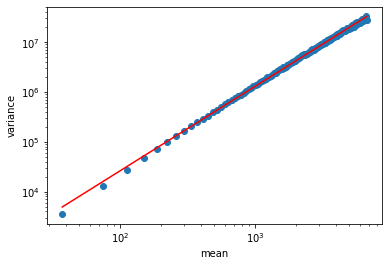

In [40]:
D = complexity.allometric_aggregation(np.array(counts["counts"]), 3*60)

In [41]:
D

1.152512135347062

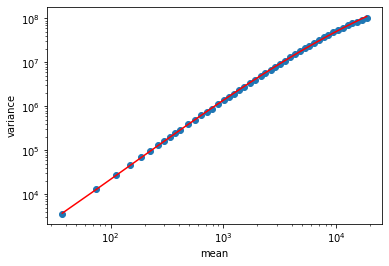

In [48]:
D, scales = complexity.adapted_allometric_aggregation(np.array(counts["counts"]), 1, 9*60)

In [49]:
print("\t%.3f\t%.3f\t%.3f" %(D[18], D[36], D[46]))

	1.139	1.287	1.404


These are the same values that we found in the table, so the method gives the same result. 

## Prepare data files

In [50]:
path = "C:\\Users\\Paloma\\Work\\mt2021_palomarabaey\\data\\trial3\\cpm_df_new\\"
activity = {}
for i in [1, 2, 3, 4, 5, 6, 8]: 
    name = "patient"+str(i)
    counts = pd.read_pickle(path+name+".p")
    activity[name] = counts

In [53]:
activity["patient1"][["counts"]].to_csv('patient1.csv')

In [56]:
for i in [1, 2, 3, 4, 5, 6]: 
    name = "patient"+str(i)
    csv_name = "activity"+str(i)
    activity[name][["counts"]].to_csv(csv_name+".csv")

In [57]:
activity["patient8"][["counts"]].to_csv("activity7.csv")

In [90]:
path = "C:\\Users\\Paloma\\Work\\mt2021_palomarabaey\\data\\trial3\\surveys\\"
survey = {}
for i in [1, 2, 3, 4, 5, 6, 8]: 
    name = "patient"+str(i)
    file = pd.read_pickle(path+name+"_features")
    survey[name] = file

In [94]:
survey["patient1"] = survey["patient1"].drop(columns=['activity', 'complexity', 'complexity 3h', 'worry', 'worry_NI1', 'worry_NI2', 'sleep_quality2'])

In [96]:
survey["patient2"] = survey["patient2"].drop(columns=['activity', 'complexity 30m', 'complexity 3h', 'worry', 'worry_NI'])

In [98]:
survey["patient3"] = survey["patient3"].drop(columns=['activity', 'complexity', 'complexity 3h', 'worry'])

In [99]:
survey["patient4"] = survey["patient4"].drop(columns=['activity', 'complexity', 'complexity 3h'])

In [101]:
survey["patient5"] = survey["patient5"].drop(columns=['activity', 'complexity 30m', 'complexity 3h', 'worry', 'worry_NI'])

In [103]:
survey["patient6"] = survey["patient6"].drop(columns=['activity', 'complexity 30m', 'complexity 3h', 'worry', 'worry_NI'])

In [105]:
survey["patient8"] = survey["patient8"].drop(columns=['activity', 'complexity', 'complexity 3h'])

In [107]:
for i in [1, 2, 3, 4, 5, 6]: 
    name = "patient"+str(i)
    csv_name = "survey"+str(i)+".csv"
    survey[name].to_csv(csv_name, index=False)

In [108]:
survey["patient8"].to_csv("survey7.csv", index=False)